## 머신러닝의 종류
* 지도학습 - **데이터와 정답**을 이용해서 패턴/규칙 파악
* 비지도 학습 - **데이터**만을 이용해서 유사도에 따른 패턴/규칙 파악
    + 비지도학습의 대표적인 분석방법 : 군집

## k-means
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹으로 만듦
* 즉, 동일 그룹내 구성원간의 유사성은 높지만 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것
    + 군집분석 SSW, SSB
* prototype based 군집 - 여러번 시도후 완성
    + 각 군집이 처음부터 완성(고정)되어 있는 것은 아니고
      군집화 시도 횟수에 따라 군집의 유형이 변함
* 활용분야
    + 소비자유형 파악 - 타겟 마케팅 적용
    + 범죄율이 높은 지역 검출
    + 이미지/얼굴/손글씨 인식 - SVM
    + 유전자 검사/지리정보를 이용해서 지형 탐사

In [1]:
from load_ds_module import *

### kmeans 알고리즘 이해하기

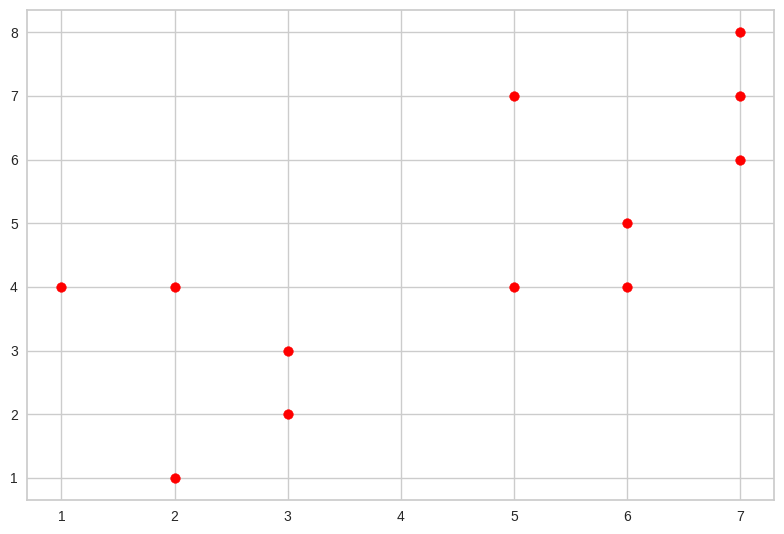

In [36]:
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

plt.scatter(x, y, color='red')
plt.grid(True)
plt.tight_layout()

# yellowbrick 까니까 grid가 안나옴
# grid 지우거나 True라고 적으니까 나옴

### 유사도 파악 
* k-means 에서는 각 점간의 거리로 비슷한 특성을 가지는 데이터를 묶음
* 따라서, 유사도 측정을 위해 임의의 기준점centeroid 선정
* 기준점과 각 점간의 거리 계산
    + 유클리드 거리 계산법 이용
    + 즉, A(x1, y1), B(x2, y2) 간의 거리 계산은
      $ \sqrt{(x2-x1)^2 + (y2-y1)^2} $ 로 함

####  기준점 선정 및 시각화
* C1, C2 = (1,5), (6,8)

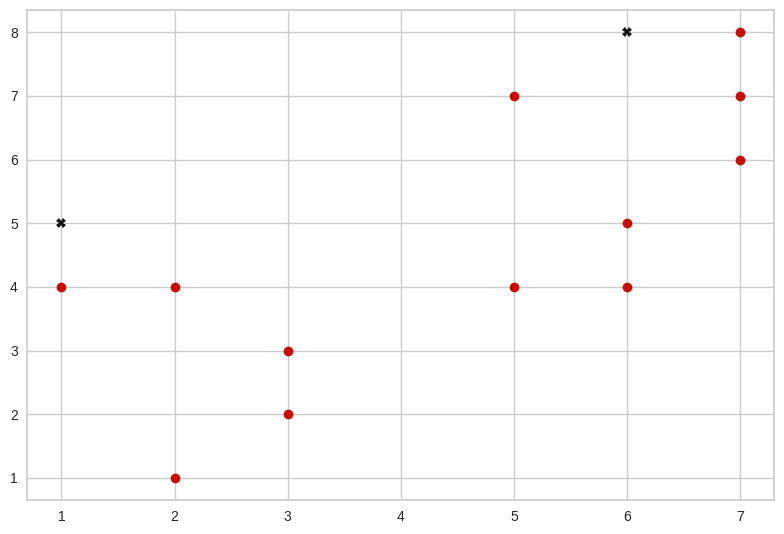

In [34]:
plt.plot(x, y, 'ro')
plt.plot([1,6], [5,8], 'kX')
plt.tight_layout()

In [4]:
import math

In [5]:
# P(5,7)은 C1 또는 C2로 분류될 지 알아봄
#         C1(1,5)     C2(6,8)
# P(5,7)    4.472      1.414 => C2로 분류

print('p -> c1', math.sqrt((1-5)**2 + (5-7)**2))
print('p -> c2', math.sqrt((6-5)**2 + (8-7)**2))

p -> c1 4.47213595499958
p -> c2 1.4142135623730951


In [6]:
# P(6,4)은 C1 또는 C2로 분류될 지 알아봄
#         C1(1,5)     C2(6,8)
# P(6,4)    5.099      4.0 => C2로 분류

print('p -> c1', math.sqrt((1-6)**2 + (5-4)**2))
print('p -> c2', math.sqrt((6-6)**2 + (8-4)**2))

p -> c1 5.0990195135927845
p -> c2 4.0


In [7]:
# P(2,4)은 C1 또는 C2로 분류될 지 알아봄
#         C1(1,5)     C2(6,8)
# P(2,4)    1.414      5.656 => C1로 분류

print('p -> c1', math.sqrt((1-2)**2 + (5-4)**2))
print('p -> c2', math.sqrt((6-2)**2 + (8-4)**2))

p -> c1 1.4142135623730951
p -> c2 5.656854249492381


### 새로운 기준점 선정

* 모든 데이터에 대한 군집화가 수행된 후 
* 새로운 센터노이드를 선정한 후 다시 유사도에 의한 군집 실시
* 새로운 센터노이드를 선정하는 방법은 각 군집별 평균값을 이용
     + 즉, 군집 C1, C2의 각 X, Y 좌표간의 평균 계산

In [8]:
# C1의 새로운 센터노이드 지정 (1,5)
# 새로운 x좌표 : 1,2,2,3,3 / 5 = 2.2
# 새로운 y좌표 : 1,2,3,4,4 / 5 = 2.8

# C2의 새로운 센터노이드 지정 (6,8)
# 새로운 x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
# 새로운 y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85

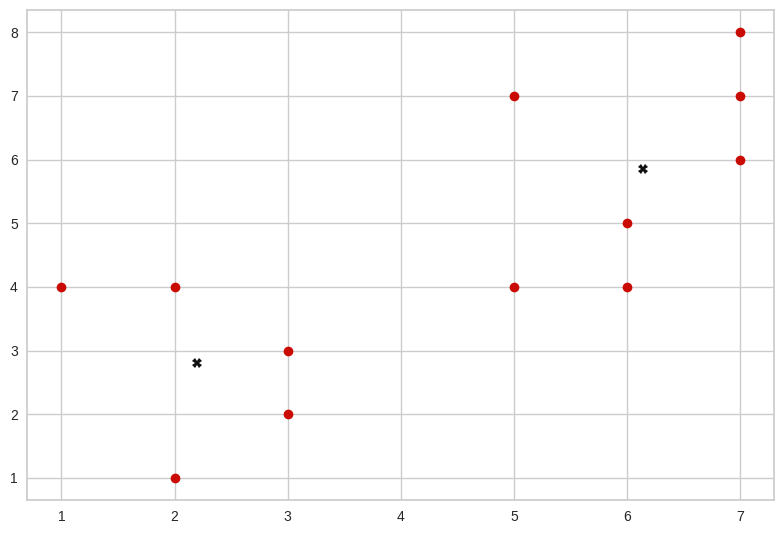

In [35]:
plt.plot(x, y, 'ro')
plt.plot([2.2,6.14], [2.8,5.85], 'kX')
plt.tight_layout()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
iris = load_iris()
data = iris.data
target = iris.target

In [12]:
# n_clusters : 실제 나눌려는 군집수
# algorithm : 군집시 사용할 거리계산 알고리즘 지정 (lloyd, elkan)
kms = KMeans(n_clusters=3, random_state=2310041045)
kms.fit(data)

KMeans(n_clusters=3, random_state=2310041045)

### 군집 결과 확인
* 군집결과는 labels_에 저장

In [13]:
kms.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [14]:
confusion_matrix(target, kms.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [15]:
accuracy_score(target, kms.labels_)

0.8933333333333333

## 실루엣/엘보우 계수
* <img src='./img/silhouette.png' width='85%'>
* iris 데이터셋 경우, 각 관측값에 대한 레이블을 알고 있기 때문에 군집성공에 대한 정확도 파악 가능
* 하지만, 레이블이 없는 데이터의 경우 **실루엣 계수**와  **엘보우 그래프 (SSE)** 를 통해 적절한 군집 계수를 파악해야 함
    + 실루엣 계수 : 군집 적합도를 수치로 나타낸 것으로 1에 가까울수록 군집이 잘된 것으로 파악
    + 엘보우SSE 계수 : 군집내 오차제곱합을 의미
    + Calinski-Harabasz 계수: 전체 데이터셋 중심에 대해 각 군집 중심이 얼마나 떨어져 있는지에 대한 분산으로 군집 여부 파악

In [16]:
# 실루엣 계수
silhouette_score(data, kms.labels_, metric='euclidean')

0.5528190123564095

In [17]:
# 엘보우 계수
kms.inertia_

78.851441426146

### 적절한 군집 갯수 알아보기

In [18]:
import warnings as warn
warn.filterwarnings('ignore', category=FutureWarning)

In [19]:
sil, elb = [], []

for k in range(2, 10):
    kms = KMeans(n_clusters=k, random_state=2310041105)
    kms.fit(data)

    ss = silhouette_score(data, kms.labels_, metric='euclidean')
    el = kms.inertia_

    sil.append(ss)
    elb.append(el)

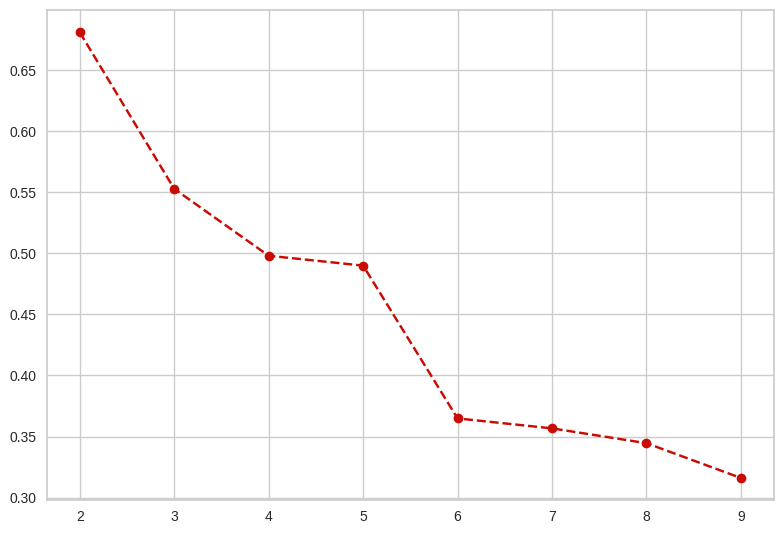

In [20]:
plt.plot(range(2, 10), sil, 'ro--')
plt.tight_layout()

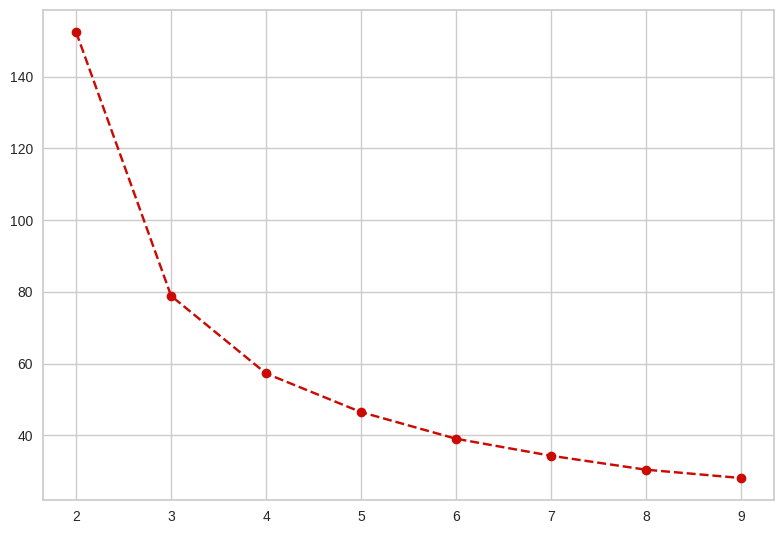

In [21]:
plt.plot(range(2, 10), elb, 'ro--')
plt.tight_layout()

### 군집 시각화 - sepal length/width

In [22]:
kms = KMeans(n_clusters=3, random_state=2310041105)
kms.fit(data)

KMeans(n_clusters=3, random_state=2310041105)

In [23]:
# cluster_centers_ : 군집 중심점을 의미하는 좌표 확인
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
# 군집 중심좌표중 sepal 만 추출
centers = pd.DataFrame(kms.cluster_centers_)
centers.columns = ['sl','sw','pl','pw']
x, y = centers.sl, centers.sw

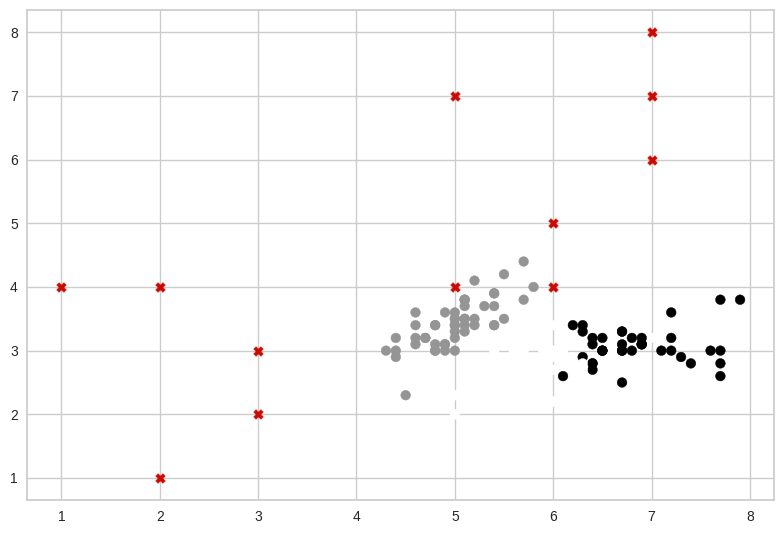

In [40]:
plt.scatter(data[:, 0], data[:, 1], c=kms.labels_)
plt.scatter(x, y, c='r', marker='X')  # 중심점 좌표 표시
plt.tight_layout()

### 군집 시각화 - petal length/width

In [26]:
kms = KMeans(n_clusters=3, random_state=2310041105)
kms.fit(data)

KMeans(n_clusters=3, random_state=2310041105)

In [27]:
x, y = centers.pl, centers.pw

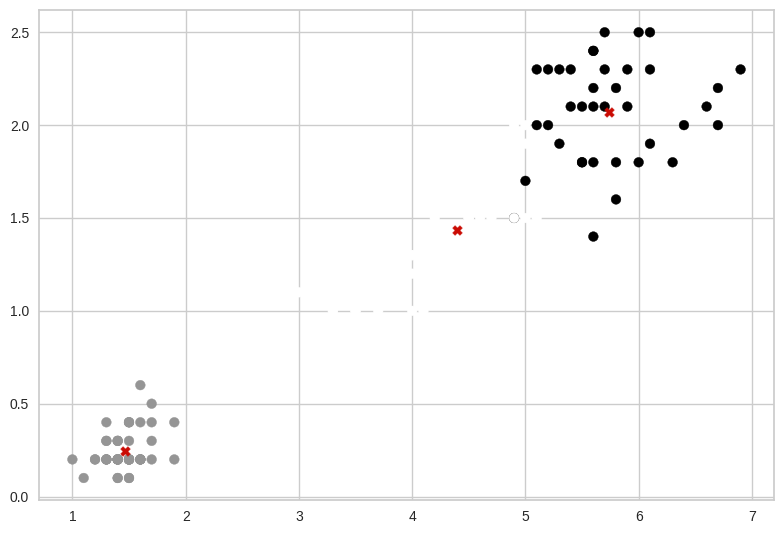

In [28]:
plt.scatter(data[:, 2], data[:, 3], c=kms.labels_)
plt.scatter(x, y, c='r', marker='X')  # 중심점 좌표 표시
plt.tight_layout()

### 실루엣, 엘보우 시각화
* yellowbrick 패키지의 KElbow/Silhouette visualizer 함수 이용
* scikit-yb.org

In [29]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

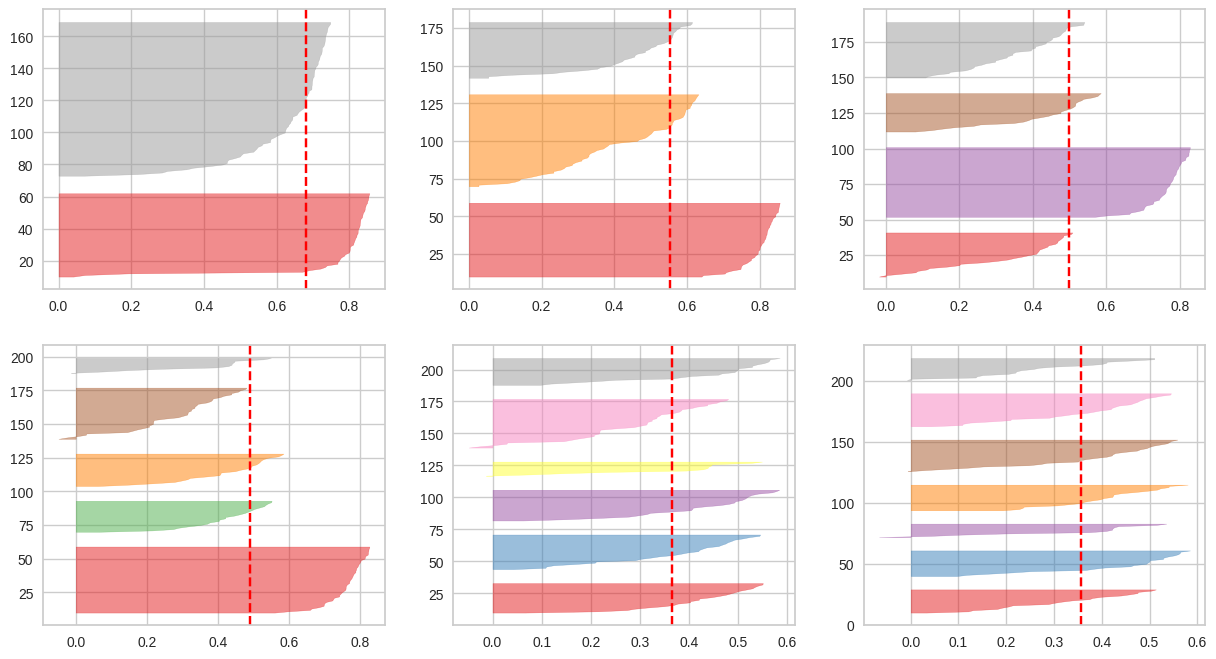

In [31]:
# ax[행][열] : 그래프 출력 위치 지정

fig, ax = plt.subplots(2,3, figsize=(15,8))
for k in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=k, random_state=2310041155)
    q, mod = divmod(k+1, 3)
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(data)

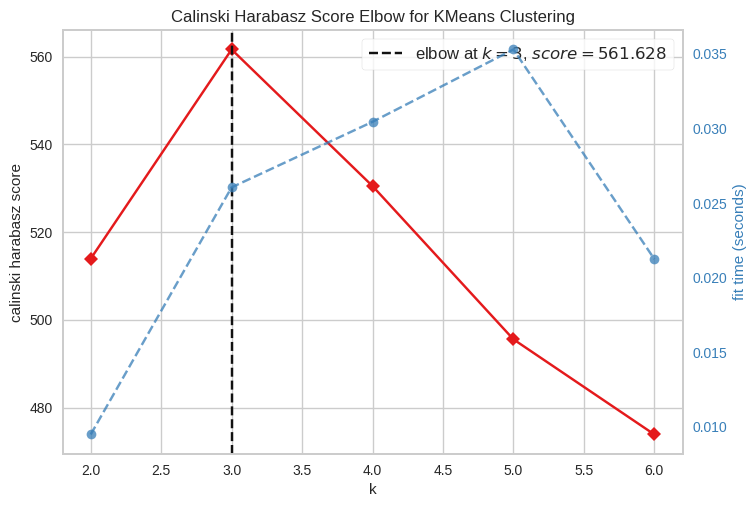

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [42]:
# calinski_harabasz : 군집내 변동 계수, 클수록 좋음

km = KMeans()
viszr = KElbowVisualizer(km, k=(2,7), 
                         metric='calinski_harabasz', timimgs=False)
viszr.fit(data)
viszr.show()

### 과일 채소 구분하기